In [0]:
!pip install flair==0.4.3

2020-01-10 06:55:29,000 Reading data from drive/My Drive
2020-01-10 06:55:29,003 Train: drive/My Drive/train.txt
2020-01-10 06:55:29,006 Dev: None
2020-01-10 06:55:29,009 Test: drive/My Drive/test.txt
33843
[b'<unk>', b'O', b'B-API', b'B-PL', b'B-Fram', b'B-Stan', b'I-Fram', b'B-Plat', b'I-Plat', b'I-API', b'I-Stan', b'I-PL', b'', b'<START>', b'<STOP>']
2020-01-10 06:55:39,945 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp1pd5ijhz


100%|██████████| 160000128/160000128 [00:11<00:00, 13813653.40B/s]

2020-01-10 06:55:52,139 copying /tmp/tmp1pd5ijhz to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-01-10 06:55:52,498 removing temp file /tmp/tmp1pd5ijhz
2020-01-10 06:55:53,146 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmpybt4lyrl


100%|██████████| 21494764/21494764 [00:02<00:00, 10058015.44B/s]

2020-01-10 06:55:55,879 copying /tmp/tmpybt4lyrl to cache at /root/.flair/embeddings/glove.gensim
2020-01-10 06:55:55,902 removing temp file /tmp/tmpybt4lyrl



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2020-01-10 06:56:06,357 ----------------------------------------------------------------------------------------------------
2020-01-10 06:56:06,358 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, bidirectional=True)
  (linear): Linear(in_features=512, out_features=15, bias=True)
)"
2020-01-10 06:56:06,359 ----------------------------------------------------------------------------------------------------
2020-01-10 06:56:06,360 Corpus: "Corpus: 33843 train + 3760 dev + 4646 test sentences"
2020-01-10 06:56:06,361 ----------------------------------------------------------------------------------------------------
2020-01-10 06:56:06,362 Parameters:
2020-01-10 06:56:06,362  - learning_rate: "0.1"
2020-01-10 06:56:06,364  - mini_batch_size: "32"
2020-01-1

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


2020-01-10 06:58:48,000 ----------------------------------------------------------------------------------------------------
2020-01-10 06:58:48,126 epoch 2 - iter 0/1058 - loss 2.39861965 - samples/sec: 27455.25
2020-01-10 06:58:59,482 epoch 2 - iter 105/1058 - loss 1.91544277 - samples/sec: 296.38
2020-01-10 06:59:10,031 epoch 2 - iter 210/1058 - loss 1.83668530 - samples/sec: 319.08
2020-01-10 06:59:21,033 epoch 2 - iter 315/1058 - loss 1.82434182 - samples/sec: 305.94
2020-01-10 06:59:31,874 epoch 2 - iter 420/1058 - loss 1.81003271 - samples/sec: 310.52
2020-01-10 06:59:42,730 epoch 2 - iter 525/1058 - loss 1.80132211 - samples/sec: 310.13
2020-01-10 06:59:53,333 epoch 2 - iter 630/1058 - loss 1.76643897 - samples/sec: 317.46
2020-01-10 07:00:04,061 epoch 2 - iter 735/1058 - loss 1.75547310 - samples/sec: 313.86
2020-01-10 07:00:14,821 epoch 2 - iter 840/1058 - loss 1.73417738 - samples/sec: 312.80
2020-01-10 07:00:25,754 epoch 2 - iter 945/1058 - loss 1.73079349 - samples/sec: 30

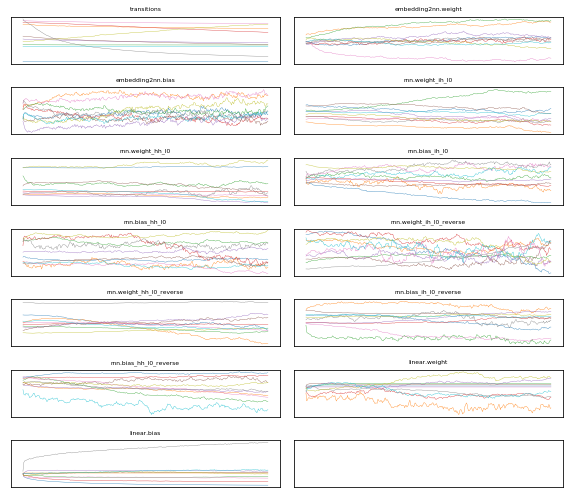

In [0]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus

# define columns
columns = {0: 'text', 1: 'pos', 2: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = 'drive/My Drive'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='train.txt',
                              test_file='test.txt')

print(len(corpus.train))

from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings
from typing import List

# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)

# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [
    WordEmbeddings('glove'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# 7. start training
trainer.train('resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)

# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('resources/taggers/example-ner/weights.txt')

In [0]:
from flair.data import Sentence

# load the model you trained
model = SequenceTagger.load('resources/taggers/example-ner/best-model.pt')

with open("input.txt") as file:
  lines = file.readlines()

result = ""
for line in lines:
  sentence = Sentence(line)
  model.predict(sentence)
  result += sentence.to_tagged_string()

print(result)

2020-01-10 08:16:46,771 loading file resources/taggers/example-ner/best-model.pt
TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem
of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML and developers
easily build and deploy ML powered applications.
TensorFlow was originally developed by researchers and engineers working on the Google Brain team within
Google's Machine Intelligence Research organization for the purposes of conducting machine learning and deep
neural networks research. The system is general enough to be applicable in a wide variety of other domains,
as well.
TensorFlow provides stable Python <B-PL> and C++ <B-PL> APIs, as well as non-guaranteed backwards compatible API for other
languages.
Keep up-to-date with release announcements and security updates by subscribing to announce@tensorflow.org.
See all the mailing lists.

See the TensorFlow install guide for the p